In [1]:
from Data_Module import get_df_feats
df_feats, feat_cols = get_df_feats(refresh=False, persist=True)

In [11]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
import seaborn as sns



In [ ]:
df_num = df_feats.select_dtypes(include=[np.number]).drop(
    columns=['player_id', 'team_id'], errors='ignore'
)
# make sure everything is float so pandas can build the covariance matrix
df_num = df_num.astype(float)
# compute covariance matrix
M = df_num.cov()
# eigenvalues and eigenvectors
from numpy import linalg as LA
w, v = LA.eig(M)
w  # eigenvalues

In [3]:
pca = PCA()
pca.fit(df_num)


,n_components,None
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [ ]:
pca.components_

array([[-3.05052307e-04,  1.25919589e-04, -6.16954191e-05, ...,
         5.20676965e-06,  9.77648608e-06,  3.01396015e-06],
       [ 1.08857143e-01,  7.19452358e-02,  1.07584721e-02, ...,
         9.27928037e-05,  7.29218532e-04,  3.59398384e-04],
       [-1.02050401e-02, -5.03795274e-02,  8.27790553e-04, ...,
         8.43264651e-05, -5.11181927e-05, -1.34806982e-05],
       ...,
       [ 0.00000000e+00, -1.33500544e-11,  1.59071198e-11, ...,
        -2.10925700e-09,  2.74164413e-09, -1.26228927e-09],
       [ 0.00000000e+00,  1.34103818e-11, -2.75365048e-11, ...,
         1.51850207e-09, -1.97408604e-09,  9.10453910e-10],
       [ 0.00000000e+00,  8.49009118e-11, -1.26372736e-10, ...,
         6.64199248e-09, -8.64365321e-09,  3.97157626e-09]],
      shape=(66, 66))

In [5]:
pca.explained_variance_

array([7.22000172e+05, 3.71677731e+02, 7.79080172e+01, 5.30984573e+01,
       3.96895053e+01, 2.48551894e+01, 1.96411857e+01, 1.41099110e+01,
       1.18165953e+01, 5.08414129e+00, 4.35385406e+00, 3.65401402e+00,
       2.32568638e+00, 2.15339816e+00, 1.98357319e+00, 1.65473975e+00,
       1.48259975e+00, 1.25964023e+00, 1.15135431e+00, 1.11966839e+00,
       9.70923217e-01, 9.56179890e-01, 9.12602623e-01, 8.53761280e-01,
       7.18807720e-01, 5.24322532e-01, 5.03409094e-01, 4.60167751e-01,
       4.02749928e-01, 3.58709128e-01, 2.58842906e-01, 2.41066056e-01,
       1.99454529e-01, 1.77034962e-01, 9.90909345e-02, 8.46690087e-02,
       5.49904070e-02, 4.46409003e-02, 3.95605531e-02, 3.24199390e-02,
       2.50537907e-02, 2.38033626e-02, 2.10450748e-02, 1.29434255e-02,
       5.79956334e-03, 4.90078463e-03, 3.22387115e-03, 2.50683405e-03,
       2.27017147e-03, 2.22855766e-03, 1.57494892e-03, 1.20113617e-03,
       6.01039714e-04, 5.33131146e-04, 5.03823658e-13, 2.95632394e-14,
      

In [8]:
pp = pca.transform(df_num)
def biplot(score,coeff,pcax,pcay,labels=None, Labels=None):
    pca1=pcax-1
    pca2=pcay-1
    xs = score[:,pca1]
    ys = score[:,pca2]
    n=score.shape[1]
    scalex = 1/(xs.max()- xs.min())
    scaley = 1/(ys.max()- ys.min())
    plt.scatter(xs*scalex,ys*scaley)
    for i in range(len(xs)): # Iterate through the number of samples
        if Labels is None:
            pass # Placeholder for empty if block
        else:
            plt.text(xs[i]*scalex, ys[i]*scaley, Labels[i], color='blue', ha='center', va='center')
    for i in range(n):
        plt.arrow(0, 0, coeff[i,pca1], coeff[i,pca2],color='r',alpha=0.5)
        if labels is None:
            plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, labels[i], color='g', ha='center', va='center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(pcax))
    plt.ylabel("PC{}".format(pcay))
    plt.grid()

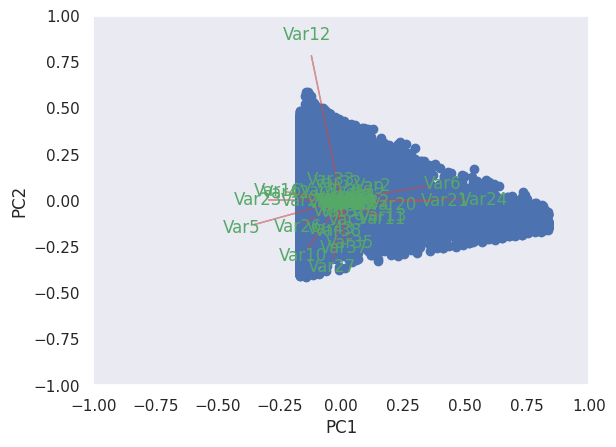

In [9]:
biplot(pp,pca.components_,1,2)
plt.show()

In [12]:
min_max_scaler = preprocessing.MinMaxScaler()
X1 = min_max_scaler.fit_transform(df_num)

In [13]:
pca = PCA()
X_pca=pca.fit(X1)

In [14]:
pca.components_

array([[ 5.96111177e-02,  8.93135656e-02,  1.64351886e-02, ...,
         4.19904194e-03,  1.08866102e-02,  8.21493758e-03],
       [-1.42182583e-01, -1.47997716e-01, -5.38318446e-02, ...,
         1.72979952e-02, -3.71886062e-03, -1.35347334e-02],
       [ 6.23662899e-02,  6.46857937e-02,  3.67914648e-02, ...,
        -1.82324522e-03, -4.11746321e-03,  1.27511414e-02],
       ...,
       [ 0.00000000e+00, -1.06701776e-13,  6.85593243e-14, ...,
         4.83241377e-14,  4.65773253e-15, -1.07192900e-14],
       [-0.00000000e+00,  1.70472587e-14,  2.09160138e-14, ...,
         4.33703976e-14,  3.81790140e-14, -6.70265709e-14],
       [-0.00000000e+00, -5.60350904e-14, -3.32167662e-14, ...,
         1.76767780e-14,  5.36724528e-14,  1.04877045e-13]],
      shape=(66, 66))

In [15]:
pca.explained_variance_

array([4.45084577e-01, 1.10371796e-01, 6.72590214e-02, 5.11309518e-02,
       4.45657821e-02, 2.97309507e-02, 2.72476787e-02, 2.47129544e-02,
       2.19244906e-02, 1.79531963e-02, 1.53406526e-02, 1.46644519e-02,
       1.28600793e-02, 1.27703911e-02, 1.15531310e-02, 8.49541053e-03,
       7.56169882e-03, 7.40454435e-03, 6.86703489e-03, 5.92944842e-03,
       5.66142362e-03, 4.11684692e-03, 3.08776396e-03, 2.03066081e-03,
       1.76739412e-03, 1.62174771e-03, 1.48798286e-03, 1.37807653e-03,
       1.29783138e-03, 1.18827891e-03, 1.04851657e-03, 9.85140776e-04,
       9.69641852e-04, 9.31118246e-04, 7.09982287e-04, 6.76818195e-04,
       5.76403510e-04, 5.45988971e-04, 4.26772864e-04, 3.48517589e-04,
       3.11339886e-04, 2.96391803e-04, 2.75474171e-04, 2.18621277e-04,
       1.71022778e-04, 1.21595486e-04, 1.15073778e-04, 9.83136799e-05,
       8.53415529e-05, 4.68335474e-05, 2.05035736e-05, 1.56460626e-05,
       1.43865807e-05, 5.32359579e-06, 2.65322426e-16, 1.70234909e-16,
      

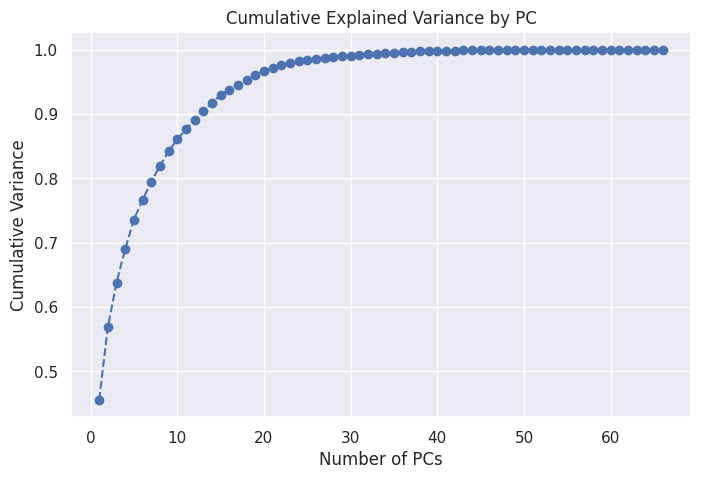

In [16]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# --- Visualize Explained variance ---
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance)+1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.title('Cumulative Explained Variance by PC')
plt.xlabel('Number of PCs')
plt.ylabel('Cumulative Variance')
plt.grid(True)
plt.show()


In [17]:
var_exp_df = pd.DataFrame({
    'Component': [f'PC{i+1}' for i in range(len(explained_variance))],
    'Explained Variance': explained_variance,
    'Cumulative Variance': cumulative_variance
})
print(var_exp_df)

   Component  Explained Variance  Cumulative Variance
0        PC1            0.455991             0.455991
1        PC2            0.113076             0.569068
2        PC3            0.068907             0.637975
3        PC4            0.052384             0.690359
4        PC5            0.045658             0.736017
..       ...                 ...                  ...
61      PC62            0.000000             1.000000
62      PC63            0.000000             1.000000
63      PC64            0.000000             1.000000
64      PC65            0.000000             1.000000
65      PC66            0.000000             1.000000

[66 rows x 3 columns]


In [20]:
features = df_num # solo las variables
labels = df_feats["player_id"]  # abreviaturas de los estados

# Escalar los datos
X_scaled = StandardScaler().fit_transform(features)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Obtener vectores de las variables originales
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

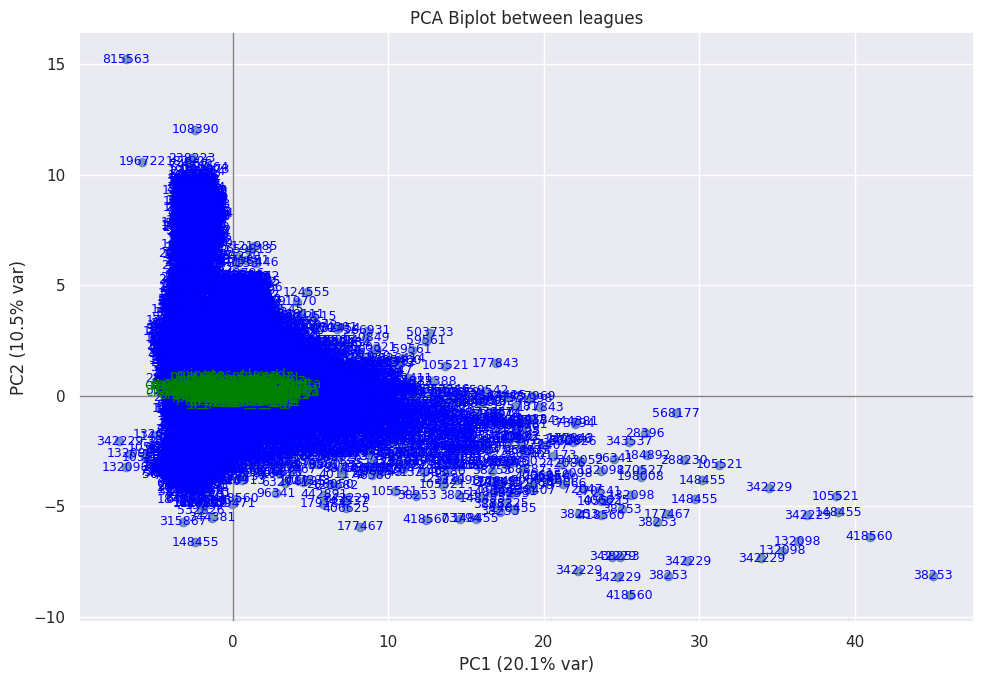

In [21]:
# Crear el biplot
plt.figure(figsize=(10, 7))

# 1. Puntos (proyecciones de los estados)
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7)

# 2. Etiquetas (abreviaturas de los estados)
for i, txt in enumerate(labels):
    plt.text(X_pca[i, 0], X_pca[i, 1], txt, fontsize=9, color='blue', ha='center', va='center')

# 3. Flechas de las variables originales
for i, var in enumerate(features.columns):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], color='brown', alpha=0.7, head_width=0.02)
    plt.text(loadings[i, 0]*1.15, loadings[i, 1]*1.15, var, color='green', ha='center', va='center', fontsize=10)

# 4. Ejes y título
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% var)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% var)")
plt.title("PCA Biplot between leagues")
plt.grid(True)
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
plt.tight_layout()
plt.show()
